In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pyedflib
import numpy as np
from datetime import timedelta
from scipy.signal import decimate
import time
from os import listdir
    #method listdir() returns a list containing the names of the entries in the directory given by path.
from os.path import isfile, join
    #returns true if file in path is an existing regular file
    

path = "Y:/ADBS"
downsampling=2
localPath = 'C:/data/raw/MOX/'
outPath = 'C:/data/processed/ESM_pilot/'

In [ ]:
threshold = 0.001
allSubs = ['110005']
subs={}
for subject in allSubs:
    leftFiles, rightFiles, chestFiles = getFileLists(localPath, subject)
    dataFrames = [[],[],[]]
    for i, files in enumerate([leftFiles, rightFiles, chestFiles]):
        for f in files:
            print(f)
            dataFrames[i] = pd.DataFrame(columns=['Time','STD'])
            try:
                signal_labels, timeStamps, sigbufs, sr = readData(f)
                stds = []
                for start in range(0,sigbufs.shape[1],200*60):
                    #print([timeStamps[start],np.std(sigbufs[0,start:start+200*60])])
                    dataFrames[i] = dataFrames[i].append({'Time':timeStamps[start],'STD':np.std(sigbufs[0,start:start+200*60])},ignore_index=True)
            except:
                print('Problem with file %s' % f)
    subs[subject]=dataFrames

C:/data/raw/MOX/110005\13799_20181002_060804.edf


C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


C:/data/raw/MOX/110005\13799_20181003_070253.edf
Problem with file C:/data/raw/MOX/110005\13799_20181003_070253.edf
C:/data/raw/MOX/110005\13799_20181003_070256.edf
C:/data/raw/MOX/110005\13799_20181004_000000.edf
C:/data/raw/MOX/110005\13799_20181004_083502.edf
C:/data/raw/MOX/110005\13799_20181005_074601.edf
C:/data/raw/MOX/110005\13799_20181006_000000.edf
C:/data/raw/MOX/110005\13799_20181006_084256.edf
C:/data/raw/MOX/110005\13799_20181007_082759.edf
C:/data/raw/MOX/110005\13799_20181008_083214.edf
C:/data/raw/MOX/110005\13799_20181009_081701.edf
C:/data/raw/MOX/110005\13799_20181010_071928.edf
C:/data/raw/MOX/110005\13799_20181011_000000.edf
C:/data/raw/MOX/110005\13799_20181011_075902.edf
C:/data/raw/MOX/110005\13799_20181012_080146.edf
C:/data/raw/MOX/110005\13799_20181013_000000.edf
C:/data/raw/MOX/110005\13799_20181013_084619.edf
C:/data/raw/MOX/110005\13799_20181014_000000.edf
C:/data/raw/MOX/110005\13799_20181014_082141.edf
C:/data/raw/MOX/110005\13799_20181015_000000.edf
C:

[Timestamp('2018-10-02 06:08:04', freq='10L'), 0.3846920070040623]
[Timestamp('2018-10-02 06:10:04', freq='10L'), 0.5746520170293419]
[Timestamp('2018-10-02 06:12:04', freq='10L'), 0.5228836521360338]
[Timestamp('2018-10-02 06:14:04', freq='10L'), 0.373107086469744]
[Timestamp('2018-10-02 06:16:04', freq='10L'), 0.4019759694945422]
[Timestamp('2018-10-02 06:18:04', freq='10L'), 0.43733510813316556]
[Timestamp('2018-10-02 06:20:04', freq='10L'), 0.05265548745767116]
[Timestamp('2018-10-02 06:22:04', freq='10L'), 0.0040087623167249335]
[Timestamp('2018-10-02 06:24:04', freq='10L'), 0.14077494393049636]
[Timestamp('2018-10-02 06:26:04', freq='10L'), 0.03349409218926714]
[Timestamp('2018-10-02 06:28:04', freq='10L'), 0.23769968163426794]
[Timestamp('2018-10-02 06:30:04', freq='10L'), 0.46546576196695394]
[Timestamp('2018-10-02 06:32:04', freq='10L'), 0.015589810316541565]
[Timestamp('2018-10-02 06:34:04', freq='10L'), 0.005981572802046559]
[Timestamp('2018-10-02 06:36:04', freq='10L'), 0.2

[Timestamp('2018-10-02 13:26:04', freq='10L'), 0.09554751866272976]
[Timestamp('2018-10-02 13:28:04', freq='10L'), 0.11264863866138616]
[Timestamp('2018-10-02 13:30:04', freq='10L'), 0.16562734170999022]
[Timestamp('2018-10-02 13:32:04', freq='10L'), 0.14816789778871206]
[Timestamp('2018-10-02 13:34:04', freq='10L'), 0.26638070280287285]
[Timestamp('2018-10-02 13:36:04', freq='10L'), 0.08041197723861304]
[Timestamp('2018-10-02 13:38:04', freq='10L'), 0.10605874861028015]
[Timestamp('2018-10-02 13:40:04', freq='10L'), 0.34743416176721564]
[Timestamp('2018-10-02 13:42:04', freq='10L'), 0.22605648520976984]
[Timestamp('2018-10-02 13:44:04', freq='10L'), 0.32603247994881696]
[Timestamp('2018-10-02 13:46:04', freq='10L'), 0.041614545280537554]
[Timestamp('2018-10-02 13:48:04', freq='10L'), 0.2753220645438074]
[Timestamp('2018-10-02 13:50:04', freq='10L'), 0.3130442232799825]
[Timestamp('2018-10-02 13:52:04', freq='10L'), 0.5059410333116765]
[Timestamp('2018-10-02 13:54:04', freq='10L'), 0.4

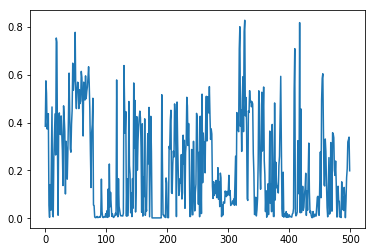

In [27]:
threshold = 0.001
stds = []
for start in range(0,sigbufs.shape[1],200*60):
    print([timeStamps[start],np.std(sigbufs[0,start:start+200*60])])
    stds.append(np.std(sigbufs[0,start:start+200*60]))
plt.plot(stds)

In [17]:
np.min(stds)
np.sum(stds>threshold)

NameError: name 'threshold' is not defined

In [4]:
# create list of files per L/R/chest from directory (mypath)
def getFileLists(localPath, subject):
    localPath = join(localPath, subject)
    leftSensors = ['13797','13799','13794']
    rightSensors = ['13805','13801','13793']
    chestSensors = ['13804','13792','13803']

    featureWindowLength=60
    windowLength=60
    esmWindowLength=15


    bdffiles = [f for f in listdir(localPath) if isfile(join(localPath,f)) and f[0]!='_' and f[-3:] =='edf']
    #bdffiles are the files in mypath, not directories

    leftFiles = []
    rightFiles = []
    chestFiles = []

    for f in bdffiles:
        if f[0:5] in leftSensors:
            leftFiles.append(join(localPath,f))
        elif f[0:5] in rightSensors:
            rightFiles.append(join(localPath,f))
        elif f[0:5] in chestSensors:
            chestFiles.append(join(localPath,f))

    leftFiles=sorted(leftFiles)
    rightFiles=sorted(rightFiles)
    chestFiles=sorted(chestFiles)
    return leftFiles, rightFiles, chestFiles

In [5]:
def readData(filename): 
    #Extract data
    f = pyedflib.EdfReader(filename)
    sr = f.getSampleFrequencies()[0]
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)    
    #Get starting time
    startingTime=f.getStartdatetime() #needs to be tested
    #startingTime=filename[-19:-4]
    #startingTime=pd.to_datetime(startingTime, format='%Y%m%d_%H%M%S', errors='ignore')
    #print(startingTime)
    sigbufs = decimate(sigbufs,downsampling,axis=1)
    sr=sr/downsampling
    timeStamps=pd.date_range(start=startingTime,periods=sigbufs.shape[1],freq='%d ms' % (1000/sr))
    return signal_labels, timeStamps, sigbufs, sr